# DATA EXPLORATION

### Exploratory Data Analysis and Implications for the Modeling Strategy
The conducted exploratory data analysis has revealed two fundamental aspects for defining an effective modeling strategy:

1. **Class imbalance** in binary classification: The asymmetric distribution of classes suggests the need for **Synthetic Minority Over-sampling Technique (SMOTE)** to ensure better representation of minority classes and enhance model performance.
2. **Multicollinearity of features**: The high correlation among certain variables indicates the necessity of **Principal Component Analysis (PCA)** for dimensionality reduction, aiming to mitigate informational redundancies and improve modeling effectiveness.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/raw/Pistachio_16_Features_Dataset.csv')

In [4]:
data.head()

,id,Area,Perimeter,Major_axis,Minor_axis,Eccentricity,Eqdiasq,Solidity,Covex_area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Class
0,1,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,2,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,3,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,4,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,5,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [5]:
data.tail()

,id,Area,Perimeter,Major_axis,Minor_axis,Eccentricity,Eqdiasq,Solidity,Covex_area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Class
2143,2144,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,Siit_Pistachio
2144,2145,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,2146,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,2147,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio
2147,2148,78466,2356.9080,445.9131,258.5125,0.8148,316.0791,0.8662,90591,0.6123,1.7249,0.1775,0.7088,0.0057,0.0033,0.5024,0.8667,Siit_Pistachio


In [6]:
data = data.drop(columns=['id'])

In [7]:
data.shape

(2148, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_axis     2148 non-null   float64
 3   Minor_axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Covex_area     2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

In [9]:
data.columns.tolist()

['Area',
 'Perimeter',
 'Major_axis',
 'Minor_axis',
 'Eccentricity',
 'Eqdiasq',
 'Solidity',
 'Covex_area',
 'Extent',
 'Aspect_Ratio',
 'Roundness',
 'Compactness',
 'Shapefactor_1',
 'Shapefactor_2',
 'Shapefactor_3',
 'Shapefactor_4',
 'Class']

In [10]:
data.describe()

,Area,Perimeter,Major_axis,Minor_axis,Eccentricity,Eqdiasq,Solidity,Covex_area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


In [11]:
data.nunique()

Area             2101
Perimeter        2144
Major_axis       2143
Minor_axis       2147
Eccentricity     1172
Eqdiasq          2101
Solidity         1070
Covex_area       2102
Extent           1222
Aspect_Ratio     1922
Roundness        1789
Compactness      1187
Shapefactor_1      58
Shapefactor_2      28
Shapefactor_3    1379
Shapefactor_4     928
Class               2
dtype: int64

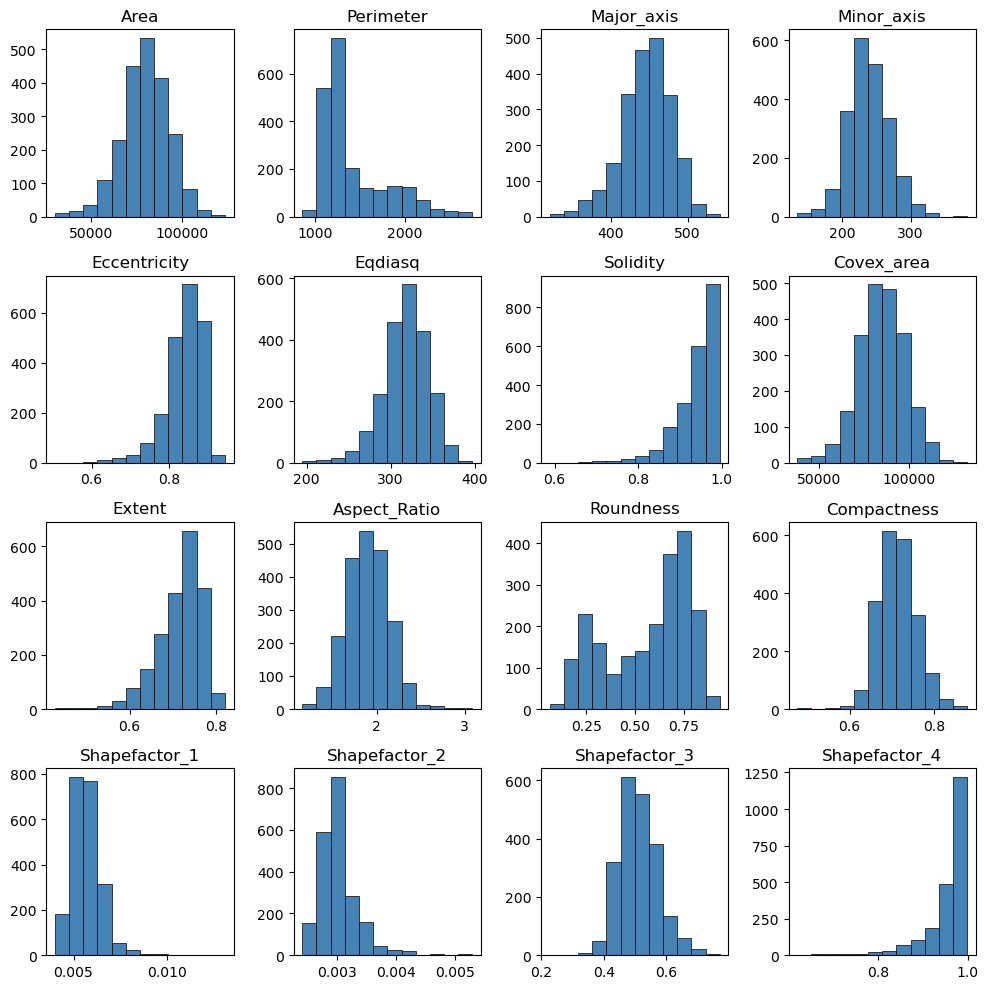

In [ ]:
axes = data.hist(bins=12, figsize=(10,10), color='steelblue', alpha=1, grid=False)

for ax in axes.flatten():  
    for patch in ax.patches:  
        patch.set_edgecolor('black') 
        patch.set_linewidth(0.5)    

plt.tight_layout()  
plt.show()

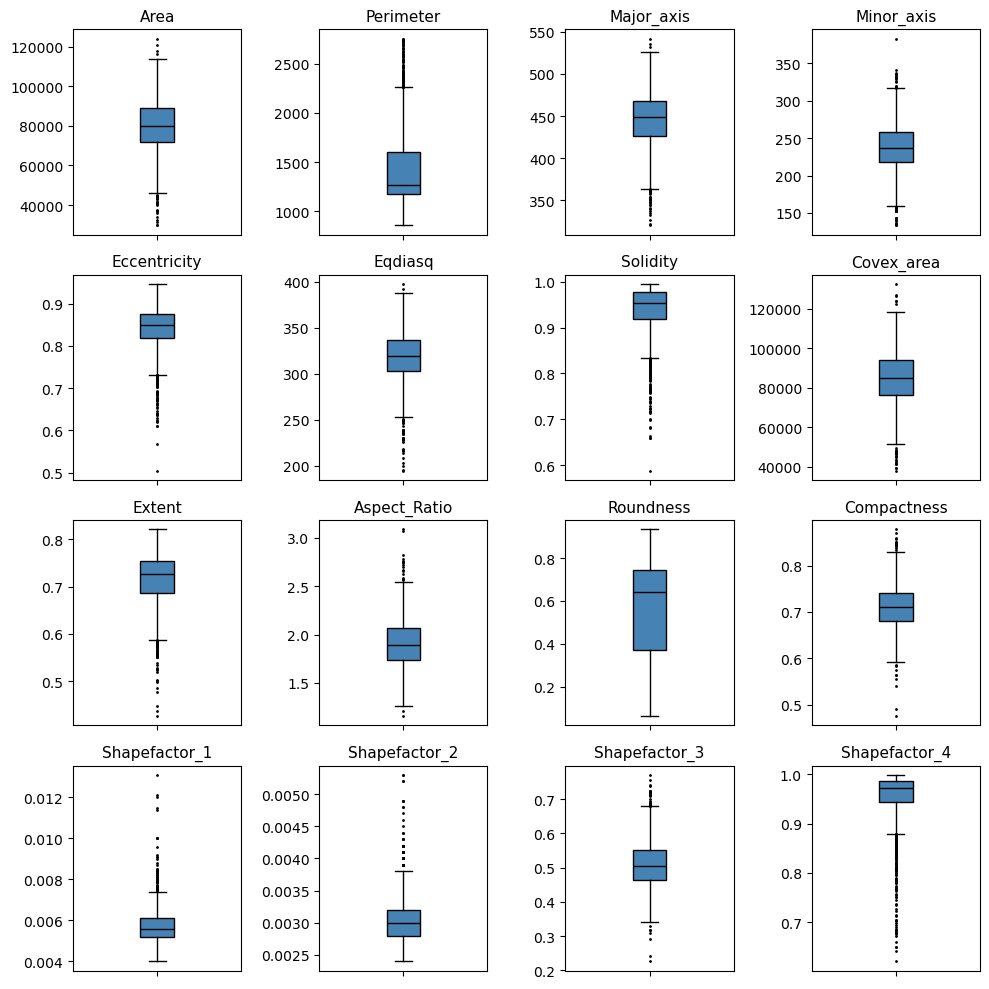

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

for i, ax in enumerate(axes.flatten()):    
    if i < len(data.columns[:-1]):         
        ax.boxplot(
            data[data.columns[:-1][i]],
            patch_artist=True,
            widths = 0.2,
            boxprops=dict(facecolor='steelblue', color='black'), 
            medianprops=dict(color='black'),  
            flierprops=dict(marker='o', color='black', markersize=1),
            notch=False
        )
        ax.set_title(f'{data.columns[:-1][i]}', fontsize = 11)
        ax.set_xticklabels([])
    else:
        ax.axis('off')                     

plt.tight_layout()                        
plt.show()

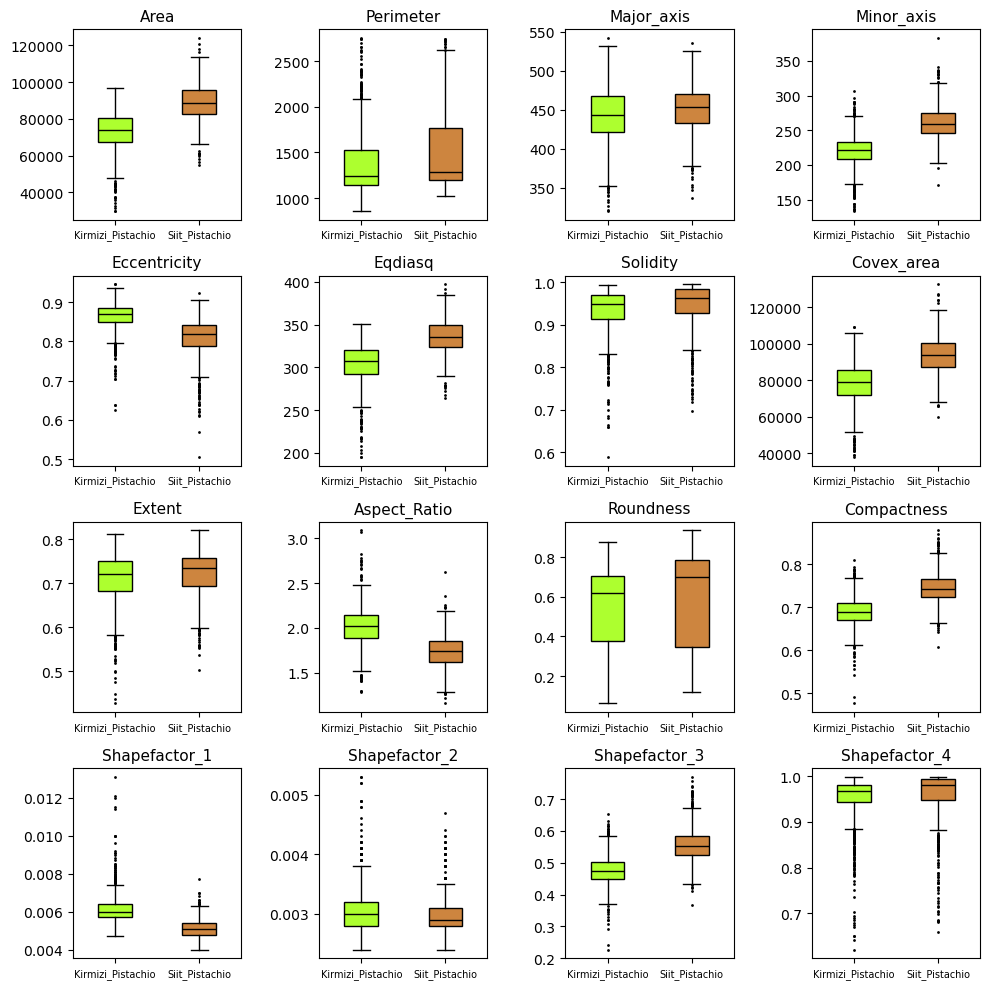

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

colors = ['greenyellow', 'peru']

for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns[:-1]):

        class_categories = data['Class'].unique()                    
        data_to_plot = [                                            
            data[data['Class'] == category][data.columns[:-1][i]]
            for category in class_categories
        ]


        boxplots = ax.boxplot(
            data_to_plot,
            patch_artist=True,
            widths=0.4,
            boxprops=dict(color='black'),
            medianprops=dict(color='black'),
            flierprops=dict(marker='o', color='black', markersize=1),
            notch=False
        )
        
        for patch, color in zip(boxplots['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_title(f'{data.columns[:-1][i]}', fontsize=11)
        ax.set_xticklabels(class_categories, fontsize = 7)  
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

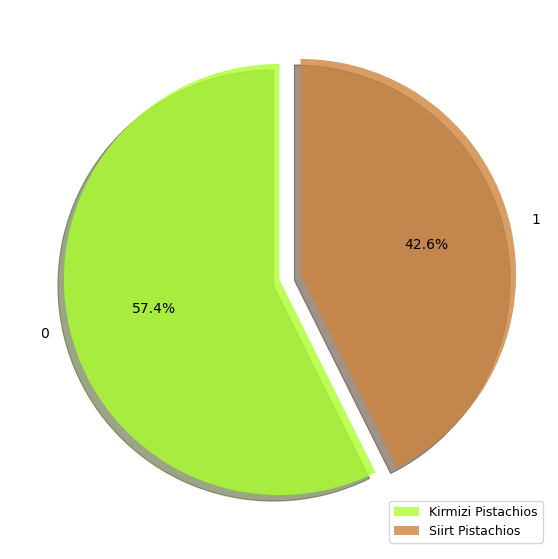

In [15]:
plt.figure(figsize=(7,7))

explode= [0,0.1]
colors=['greenyellow', 'peru']
labels=['0','1']
sizes = np.array([data['Class'].value_counts().iloc[0],data['Class'].value_counts().iloc[1]])   

plt.pie(sizes, shadow=True, explode=explode, startangle=90, labels=labels,autopct='%1.1f%%',
        colors=colors, wedgeprops={'alpha':0.80, 'linewidth':0.8})
plt.legend(['Kirmizi Pistachios', 'Siirt Pistachios'], fontsize=9, loc='lower right')

plt.show()

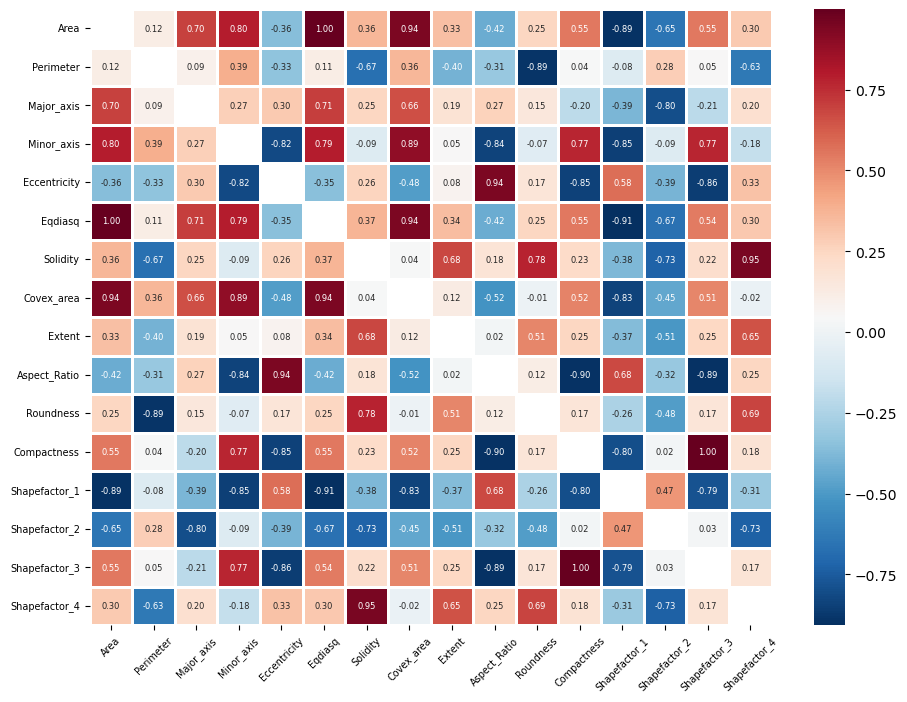

In [ ]:
plt.figure(figsize=(11,8))

correlation_matrix = data.iloc[:, :-1].corr()
mask = np.eye(correlation_matrix.shape[0], dtype=bool)

sns.heatmap(
    correlation_matrix,
    mask = mask,
    annot=True,                
    annot_kws={"size": 6},     
    cmap='RdBu_r',            
    fmt=".2f",                     
    linewidths=2           
)

plt.xticks(fontsize=7, rotation=45)  
plt.yticks(fontsize=7, rotation=0) 
plt.show()